In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from collections import Counter
import tensorflow as tf

In [8]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Text(0.5, 0.98, 'Sample MNIST Digits')

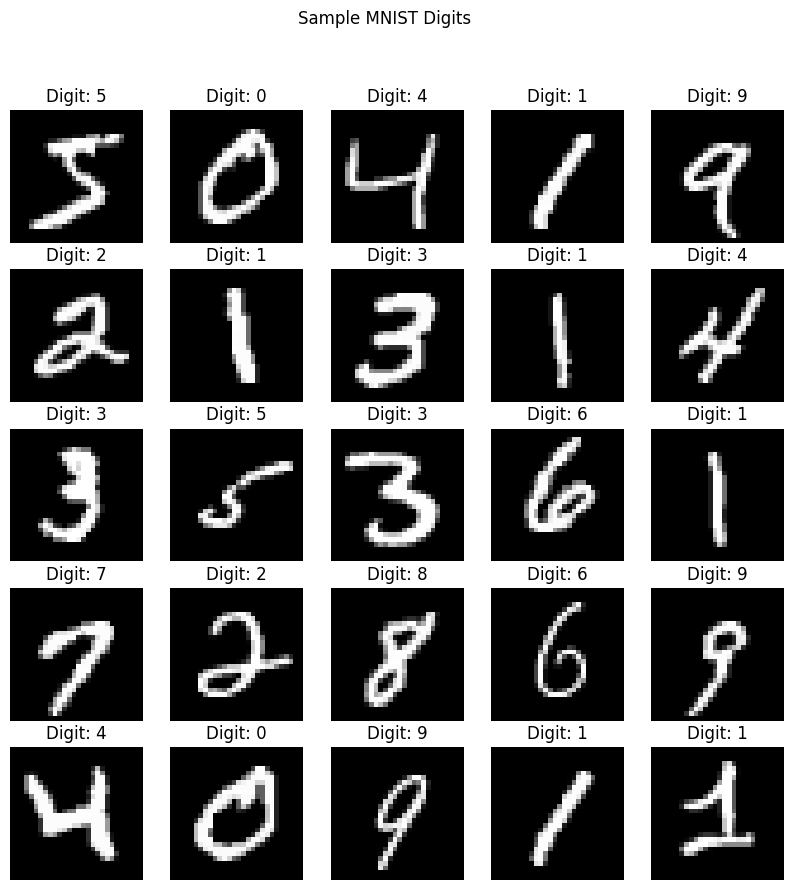

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')


Text(0, 0.5, 'Count')

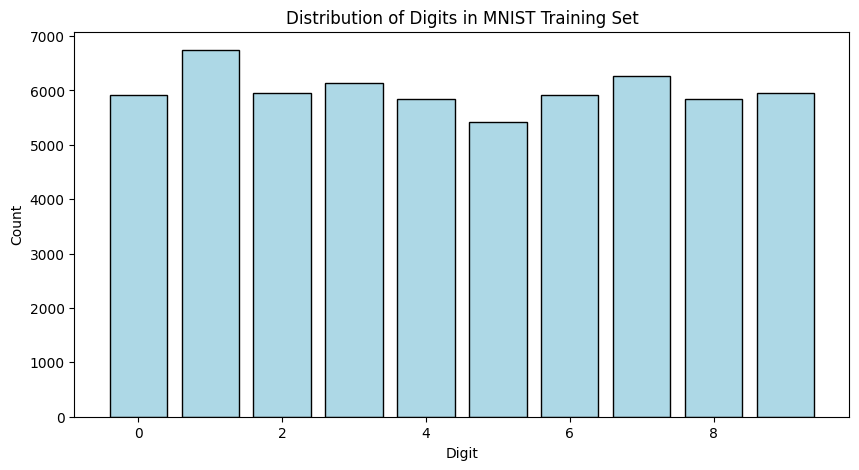

In [10]:
digit_counts = Counter(y_train)
digits = list(digit_counts.keys())
counts = list(digit_counts.values())
plt.figure(figsize=(10, 5))
plt.bar(digits, counts, color='lightblue', edgecolor='black')
plt.title('Distribution of Digits in MNIST Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')

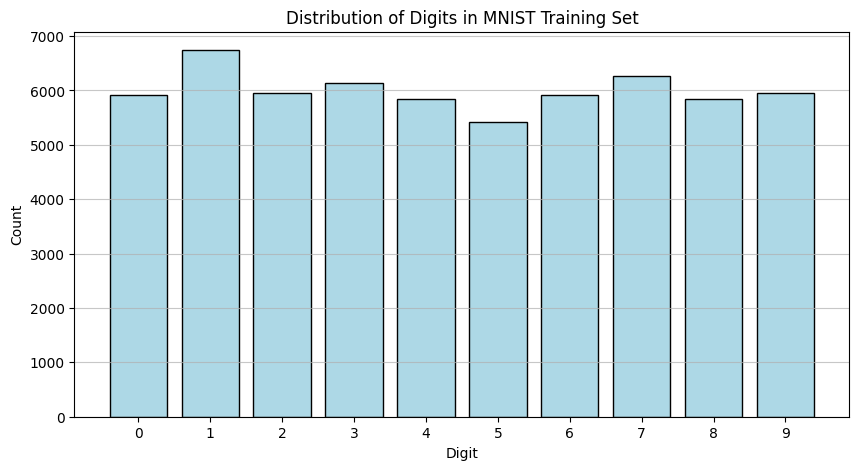

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(digits, counts, color='lightblue', edgecolor='black')
plt.title('Distribution of Digits in MNIST Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(digits)
plt.grid(axis='y', alpha=0.7)
plt.show()
plt.savefig('distribution.png', dpi=300, bbox_inches='tight')


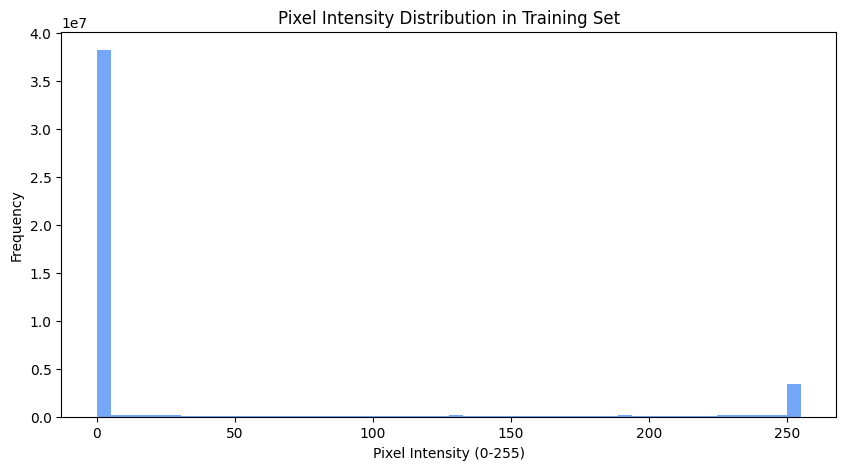

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(X_train.ravel(), bins=50, color='#3B82F6', alpha=0.7)
plt.title('Pixel Intensity Distribution in Training Set')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.show()

In [13]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8005 - loss: 0.6321 - val_accuracy: 0.9773 - val_loss: 0.0675
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9666 - loss: 0.1132 - val_accuracy: 0.9847 - val_loss: 0.0448
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0786 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0605 - val_accuracy: 0.9879 - val_loss: 0.0355
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9911 - val_loss: 0.0286
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9878 - loss: 0.0439 - val_accuracy: 0.9914 - val_loss: 0.0243
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9909 - val_loss: 0.0253
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0344
Test accuracy: 0.9919


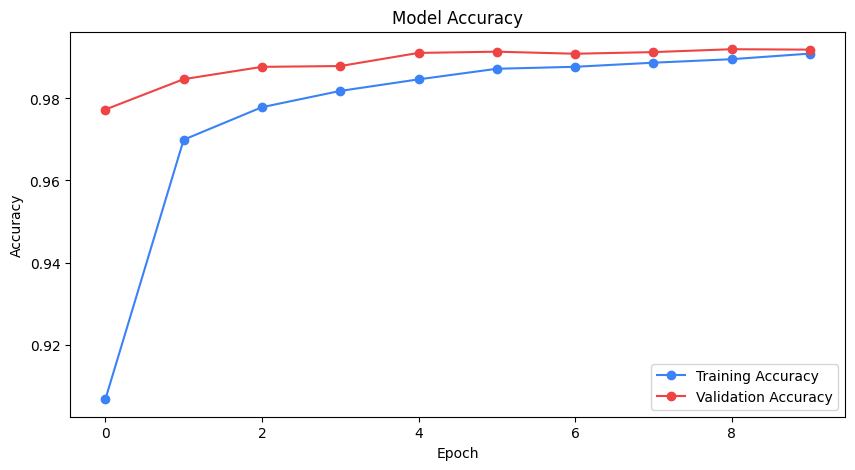

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#3B82F6',marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#EF4444',marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

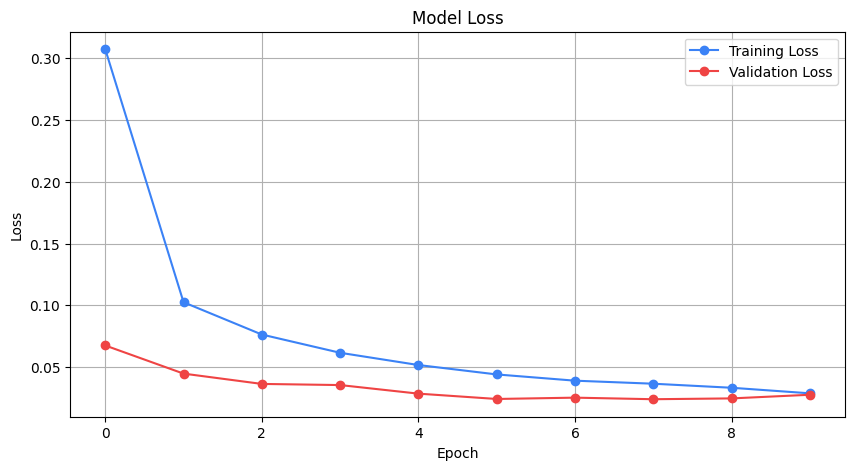

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='#3B82F6',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#EF4444',marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Predicted digit: 7


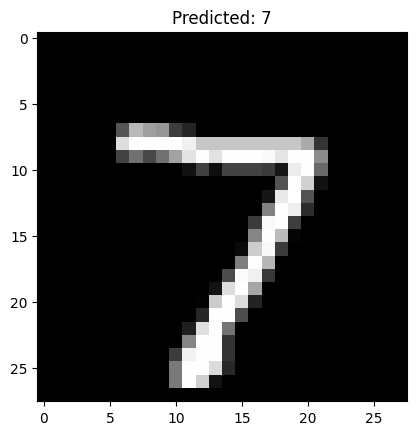

In [20]:
sample_image = X_test[0:1]
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction, axis=1)[0]
print(f"Predicted digit: {predicted_digit}")

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()

In [22]:
model.save('mnist_model.keras')